In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [57]:
# Load the data
data = pd.read_pickle("train/all_data_train.pkl")

# Select only numeric columns for NaN and infinity handling
numeric_data = data.select_dtypes(include=[np.number])

# Replace infinite values with NaN
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the column's mean
imputer = SimpleImputer(strategy="mean")
numeric_data = pd.DataFrame(
    imputer.fit_transform(numeric_data), columns=numeric_data.columns
)

# Update the original data with the cleaned numeric data
data.update(numeric_data)

# Split the data into features and labels
X = data.drop(columns=["class"])
y = data["class"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:
# Create the model
model = KNeighborsClassifier()

# Define the hyperparameters
param_grid = {"n_neighbors": np.arange(1, 5)}

# Create the gridsearch
grid = GridSearchCV(model, param_grid, cv=5)

# Train the model
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [59]:
# Get the optimal hyperparameters
print("Optimal hyperparameters:", grid.best_params_)
print("Accuracy:", grid.best_score_)
# Get the accuracy for all k-values
results = grid.cv_results_
# get the accuracy for all k-values
results = grid.cv_results_
k_values = results["param_n_neighbors"].data
accuracies = results["mean_test_score"]

Optimal hyperparameters: {'n_neighbors': 3}
Accuracy: 0.9012732752156932


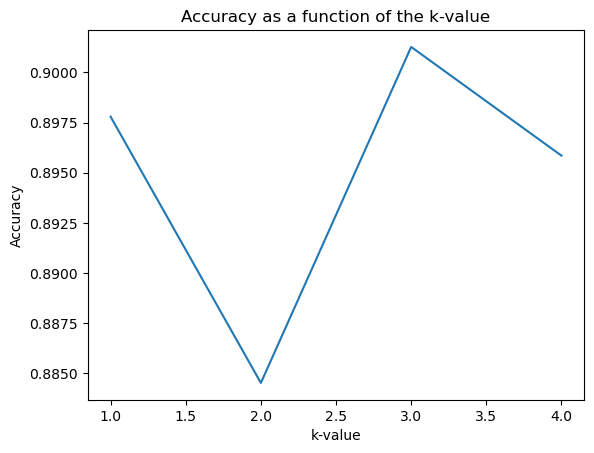

In [60]:
# Plot the accuracy as a function of the k-value. You need to extract that
# information from the model. How sensitive is the performance of the
# model for different k-values?

plt.plot(k_values, accuracies)
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.title("Accuracy as a function of the k-value")
plt.show()

/Users/ahmedabd/miniconda3/envs/my_jupyter_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy on the test set: 0.8996106785317018


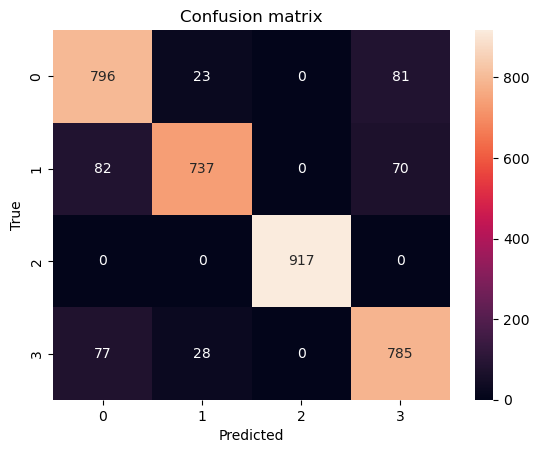

In [61]:
# Impute NaN and infinite values with the mean of the column
X_test = imputer.transform(X_test)
# y_test = imputer.transform(y_test.values.reshape(-1, 1))  # If y_test is a 1D array

# Use the model on the test set
y_pred = grid.predict(X_test)

# Acquire the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

/Users/ahmedabd/miniconda3/envs/my_jupyter_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy on the test set: 0.8886477462437395


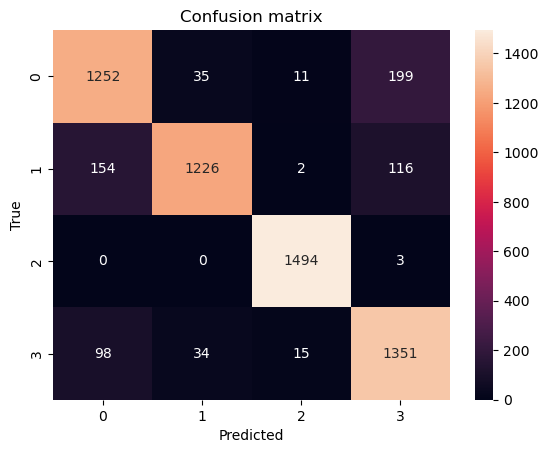

In [62]:
# try with the valiid data
data_val = pd.read_pickle("test/all_data_test.pkl")
# spleet the data into features and labels
X_val = data_val.drop(columns=["class"])
y_val = data_val["class"]

# Impute NaN and infinite values with the mean of the column
X_val = imputer.transform(X_val)
# y_val = imputer.transform(y_val.values.reshape(-1, 1))  # If y_val is a 1D array


# Use the model on the test set
y_pred = grid.predict(X_val)

# Acquire the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the test set:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

/Users/ahmedabd/miniconda3/envs/my_jupyter_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy on the valid set: 0.9075742409075742


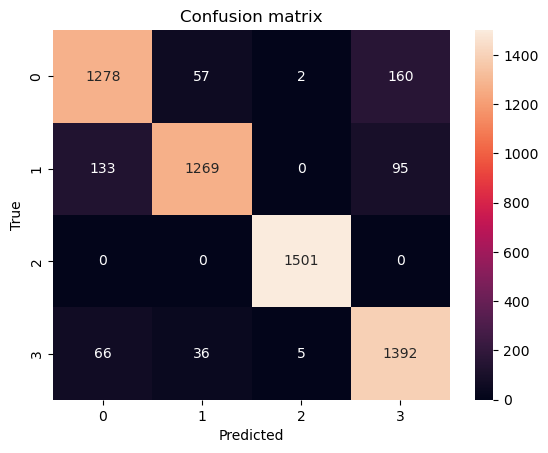

In [63]:
# try with the valiid data
data_val = pd.read_pickle("valid/all_data_valid.pkl")
# spleet the data into features and labels
X_val = data_val.drop(columns=["class"])
y_val = data_val["class"]

# Impute NaN and infinite values with the mean of the column
X_val = imputer.transform(X_val)
# y_val = imputer.transform(y_val.values.reshape(-1, 1))  # If y_val is a 1D array


# Use the model on the valid set
y_pred = grid.predict(X_val)

# Acquire the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the valid set:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

/Users/ahmedabd/miniconda3/envs/my_jupyter_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Optimal hyperparameters: {'n_neighbors': 3}
Accuracy: 0.9299181122354019


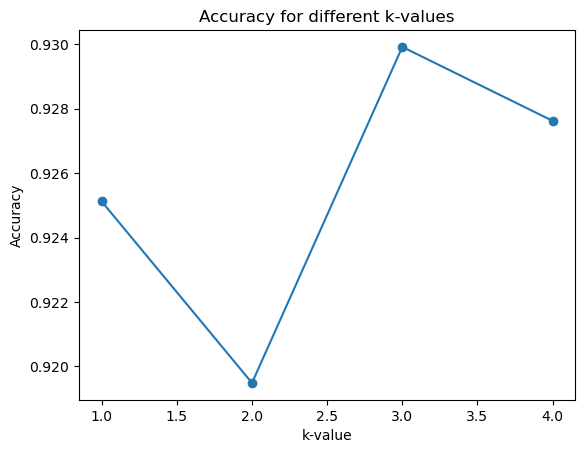

In [64]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # Create the gridsearch
grid = GridSearchCV(model, param_grid, cv=5)

# # Train the model
grid.fit(X_train, y_train)

# # Get the optimal hyperparameters
print("Optimal hyperparameters:", grid.best_params_)
print("Accuracy:", grid.best_score_)

# Get the accuracy for all k-values
results = grid.cv_results_
k_values = results["param_n_neighbors"].data
accuracies = results["mean_test_score"]

# Plot the accuracy as a function of the k-value
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k-values")
plt.show()